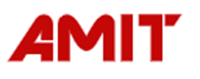
 # Deep Learning Final Project

This final project conclusively proves your understanding and comprehension of each part of the explanation, so you must perform all the following tasks to confirm your understanding and knowledge of each topic.

**

#### In this exceptional project, we will cover all topics related to deep learning. Therefore, it’s important to study carefully and answer each section thoroughly to demonstrate your understanding of the module. The final part is optional, but it’s highly encouraged if you make an effort to complete it. We will discuss the project in our upcoming lectures with each individual to ensure a comprehensive understanding of this extensive subject.



To assess your understanding we use a popular dataset called MNIST
- The MNIST dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:

60,000 training images and 10,000 test images.
Each image is a 28x28 grayscale image representing a handwritten digit (0-9).
The pixel values range from 0 (black) to 255 (white).
- Labels:

Each image has a corresponding label indicating which digit (0-9) it represents.

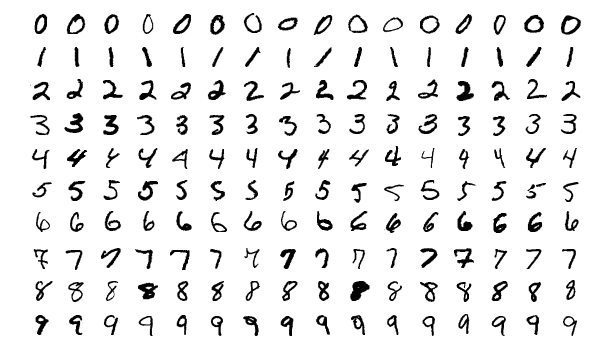

for  every project 

In [1]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import sys
sys.path.append("../..")
# import matplotlib_utils
from importlib import reload
from sklearn.model_selection import ParameterGrid
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tqdm import tqdm


We're using TF 2.17.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train [shape (48000, 28, 28)] sample patch:
 [[  0  77 254 154   0]
 [  0 145 253  96   0]
 [  0 254 238  37   0]
 [  0 254 229   0   0]
 [  0 254 246  69   0]]
A closeup of a sample patch:


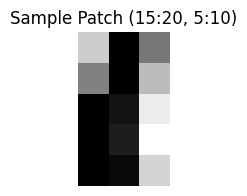

And the whole sample:


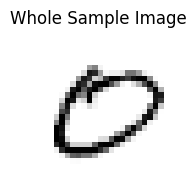

y_train [shape (48000,)] 10 samples:
 [5 0 1 6 1 3 8 8 1 8]


In [3]:
fig, ax = plt.subplots(figsize=(2, 2))  # Set figure size (width, height) in inches

# Display a sample patch from the image
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
ax.set_title("Sample Patch (15:20, 5:10)")
ax.axis('off')  # Hide the axes
plt.show()

# Display the whole sample image with a different size
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust the size as needed
print("And the whole sample:")
ax.imshow(X_train[1], cmap="Greys")
ax.set_title("Whole Sample Image")
ax.axis('off')  # Hide the axes
plt.show()

# Display the y_train values
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])


# Load and preprocess the MNIST dataset

In [4]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0




# Flatten the images (28x28 -> 784)

In [5]:

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



# One-hot encode labels

In [6]:

y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

print(y_train_oh[:10])
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]


# Define a function to create and compile the model


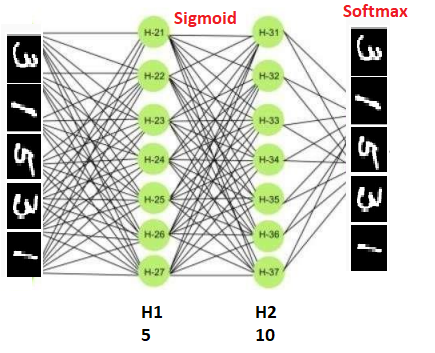

In [7]:
# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

e:\machine learning course\visual studio programs\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4717 - loss: 1.8953 - val_accuracy: 0.7524 - val_loss: 1.1447
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7554 - loss: 1.0558 - val_accuracy: 0.7987 - val_loss: 0.8122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7964 - loss: 0.7899 - val_accuracy: 0.8217 - val_loss: 0.6718
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8145 - loss: 0.6792 - val_accuracy: 0.8361 - val_loss: 0.6011
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8328 - loss: 0.6096 - val_accuracy: 0.8401 - val_loss: 0.5644
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8372 - loss: 0.5812 - val_accuracy: 0.8491 - val_loss: 0.5322
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8512 - loss: 0.5338 - val_accuracy: 0.8569 - val_loss: 0.5114
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8557 - loss: 0.5169 - 

#### Put here the accuracy of the basic model 
| Accuracy         | 0.882200238418579   |
|--------------|----------------|
 #### Give me the reson for this result  : training and test are close to 85% so, there is no bias or variance

✅ <font color='green'>Great Answer </font> 

# Gride search algorithm to choose the best parameters

for code below try to choose another papmeters and try to built all avalaible parameters


In [8]:
import tensorflow as tf

from scikeras.wrappers import KerasClassifier, KerasRegressor

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.1):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid for grid search
param_grid = {
    'batch_size': [500,1000],            # Different batch sizes
    'epochs': [10,20],                     # Different number of epochs
    'model__optimizer': ['adam','rmsprop'],  # Different optimizers with proper prefix
    'model__learning_rate': [ 0.01,0.001]  # Different learning rates with proper prefix
}


# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model_.evaluate(X_test, y_test_oh) 
print(f"Test Accuracy: {test_acc}")


Grid Search Progress:   0%|          | 0/4 [00:00<?, ?iteration/s]e:\machine learning course\visual studio programs\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
e:\machine learning course\visual studio programs\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Grid Search Progress:  25%|██▌       | 1/4 [02:40<08:01, 160.34s/iteration]


Best score: 0.8803166666666667 using {'batch_size': 500, 'epochs': 20, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.8615, Std: 0.0133, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.8647, Std: 0.0082, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.7590, Std: 0.0234, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.001, 'model__optimizer': 'adam'}
Mean: 0.7489, Std: 0.0365, Params: {'batch_size': 500, 'epochs': 10, 'model__learning_rate': 0.001, 'model__optimizer': 'rmsprop'}
Mean: 0.8693, Std: 0.0080, Params: {'batch_size': 500, 'epochs': 20, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.8803, Std: 0.0045, Params: {'batch_size': 500, 'epochs': 20, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.8041, Std: 0.0147, Params: {'batch_size': 500, 'epochs': 20, 'model__learning_rate': 0.

- so kindly fill the table below to enhance your good choise  

-parameters on grid search 
| batch_size | optimizer_1 | optimizer_2 | learning_rate_1 | learning_rate_2 |
|------------|-------------|-------------|-----------------|-----------------|
|500          | adam        | rmsprop     | 0.001           | 0.01            |
|1000         | adam        | rmsprop     | 0.001           | 0.01            |
|             | adam        | rmsprop     | 0.001           | 0.01            |
|             | adam        | rmsprop     | 0.001           | 0.01            |
|             | adam        | rmsprop     | 0.001           | 0.01            |
|             | adam        | rmsprop     | 0.001           | 0.01            |

-

 print here the best paramerters give you the best accuracy regarding for archticture design above
- | batch_size         | optimizer | learning_rate      | Accueracy      |

  |1000               |adam       |0.01                |0.87             |
   |..............|.....|..................|-----------------|

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

✅ <font color='green'>Great Answer </font> 

In [9]:
# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.01)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=20, batch_size=1000, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3904 - loss: 2.0060 - val_accuracy: 0.7604 - val_loss: 1.4388
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7663 - loss: 1.3315 - val_accuracy: 0.8299 - val_loss: 1.0049
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8247 - loss: 0.9673 - val_accuracy: 0.8496 - val_loss: 0.7858
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.7733 - val_accuracy: 0.8577 - val_loss: 0.6686
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.6655 - val_accuracy: 0.8644 - val_loss: 0.5979
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8614 - loss: 0.5975 - val_accuracy: 0.8709 - val_loss: 0.5480
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8667 - loss: 0.5585 - val_accuracy: 0.8748 - val_loss: 0.5163
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.5156 - val_accuracy: 0.8737 - val_loss:

Here  i was converted squentional model into functional ApI Model
- so re-design Your model by adding some hidden layer and change the activation function

In [10]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(50, activation='relu')(inputs)
    # Hidden layer2
    x2 = tf.keras.layers.Dense(50, activation='relu')(x)
    # Hidden layer2
    x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x4)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=500, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5363 - loss: 1.4779 - val_accuracy: 0.9097 - val_loss: 0.3129
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9169 - loss: 0.2896 - val_accuracy: 0.9392 - val_loss: 0.2088
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9402 - loss: 0.2023 - val_accuracy: 0.9468 - val_loss: 0.1845
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9513 - loss: 0.1675 - val_accuracy: 0.9546 - val_loss: 0.1541
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9614 - loss: 0.1291 - val_accuracy: 0.9572 - val_loss: 0.1498
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9650 - loss: 0.1173 - val_accuracy: 0.9610 - val_loss: 0.1327
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9687 - loss: 0.1059 - val_accuracy: 0.9622 - val_loss: 0.1273
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9729 - loss: 0.0941 - val_accuracy: 0.9658 - val_loss

Total Samples: The MNIST dataset has 60,000 training samples.

Batch Size: If your batch size is set to 40 (for example), each batch consists of 40 samples.

Batches per Epoch: The total number of batches for an epoch is calculated by dividing the total number of samples by the batch size. For instance, with 60,000 samples and a batch size of 40:

Epoch Iteration: During each epoch, the model goes through all the batches (1500 in this case), which means it sees all the training data once.



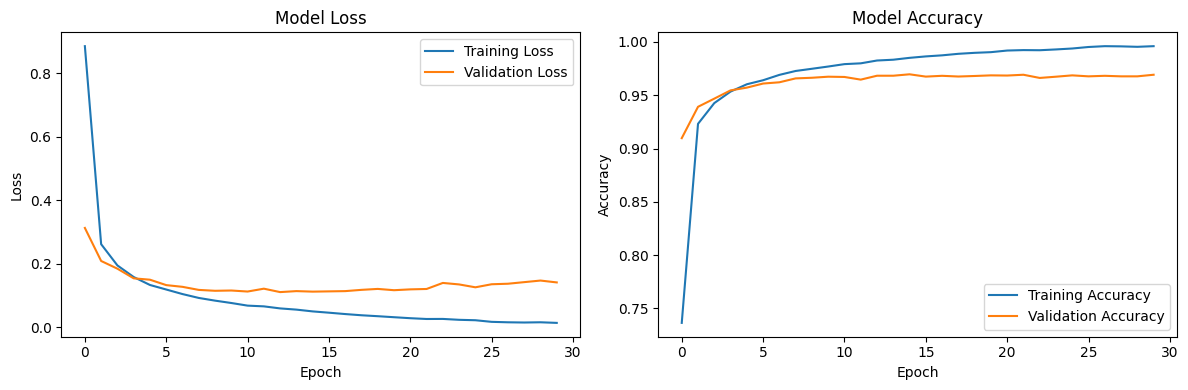

In [11]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


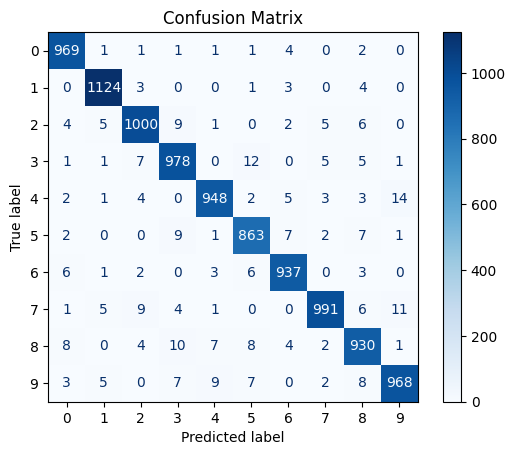

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hints!!!!

Total batches = Total samples / Batch size = 10,000 / 32 ≈ 313 batches.

# Answer the below Questions 

# Q1
### Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer?

While the sigmoid function has its advantages for certain tasks, especially in output layers for binary classification (Simplicity: The sigmoid function outputs values between 0 and 1, which makes it easy to interpret and apply a threshold to determine class membership.), its drawbacks in hidden layers have led to the preference for other activation functions like ReLU (Rectified Linear Unit). These alternatives mitigate the issues of vanishing gradients and improve training efficiency

✅ <font color='green'>cheers Great Answer </font> 

# Q2: For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.

In [13]:
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
   # Hidden layer
    x = tf.keras.layers.Dense(50, activation='relu')(inputs)
    # Hidden layer2
    x2 = tf.keras.layers.Dense(50, activation='relu')(x)
    # Hidden layer2
    x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x4)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [500],            # Different batch sizes
    'epochs': [30],                     # Different number of epochs
    'model__optimizer': ['SGD','Momentum','rmsprop','AdaDelta','Adagrad','adam'],  # Different optimizers with proper prefix
    'model__learning_rate': [ 0.01]  # Different learning rates with proper prefix
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model_.evaluate(X_test, y_test_oh)  # Use `model_` to access the underlying Keras model
print(f"Test Accuracy: {test_acc}")

Grid Search Progress:   0%|          | 0/1 [00:00<?, ?iteration/s]e:\machine learning course\visual studio programs\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "e:\machine learning course\visual studio programs\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\machine learning course\visual studio programs\.venv\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwar

Best score: 0.9638 using {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
Mean: 0.9138, Std: 0.0052, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
Mean: nan, Std: nan, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'Momentum'}
Mean: 0.9596, Std: 0.0055, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
Mean: 0.8618, Std: 0.0052, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'AdaDelta'}
Mean: 0.9409, Std: 0.0020, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'Adagrad'}
Mean: 0.9638, Std: 0.0017, Params: {'batch_size': 500, 'epochs': 30, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1913
Test Accuracy: 0.9656000137329102



| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         |    0.9099            |
| Momentum    |    nan            |
| RMSprop     |    0.9619            |
| AdaDelta    |    0.8589            |
| Adagrad     |     0.9431           |
| Adam        |     0.9622           |

-

✅ <font color='green'>Great Answer </font> here also you can telling us the ADAM optimizer is very good one and hight value with rmsprom so kindly tell me why rmsprom is second one after ADAM

# Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?

Main Causes of the Vanishing Gradient Problem: 
1- Activation Functions: Many traditional activation functions, like the sigmoid and hyperbolic tangent (tanh), squash their outputs to a limited range. For large input values, these functions approach their asymptotes, resulting in very small gradients (near zero). When these small gradients are multiplied across many layers during backpropagation, they can diminish to insignificance, effectively preventing weight updates.✅ <font color='green'>Great Answer </font> 

2- Deep Architectures: In deep networks, the number of layers compounds the problem. As gradients propagate back through each layer, small gradients can become exponentially smaller, leading to little or no learning in the earlier layers.✅ <font color='green'>Great Answer </font> 

3- Weight Initialization: Poor initialization of weights can also exacerbate the vanishing gradient problem. If weights are too small, the outputs of neurons can be squashed to the extremes of their activation functions, leading to near-zero gradients.✅ <font color='green'>Great Answer </font> 

Solutions to the Vanishing Gradient Problem:

1- Use of ReLU and Variants: ReLU (Rectified Linear Unit) and its variants (e.g., Leaky ReLU, Parametric ReLU) help mitigate the vanishing gradient problem because they do not saturate for positive inputs, allowing for a more robust flow of gradients.✅ <font color='green'>Great Answer </font> 

2- Batch Normalization: This technique normalizes the inputs of each layer, which can stabilize the distribution of inputs and gradients during training. It helps keep the values in a more manageable range, reducing the likelihood of vanishing gradients.✅ <font color='green'>Great Answer </font> 

3- Better Weight Initialization: Techniques such as He initialization (for ReLU activations) and Xavier/Glorot initialization (for tanh and sigmoid activations) can help ensure that the weights are set to values that keep the signals in a suitable range, reducing the risk of saturation in activation functions.✅ <font color='green'>Great Answer </font> 

## "In the code below, the model is likely experiencing the vanishing gradient problem. Try to solve it in a separate cell."

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

e:\machine learning course\visual studio programs\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1011 - loss: 6.5660 - val_accuracy: 0.1060 - val_loss: 2.3041
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1089 - loss: 2.3050 - val_accuracy: 0.1081 - val_loss: 2.3118
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1053 - loss: 2.3081 - val_accuracy: 0.1035 - val_loss: 2.3044
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1022 - loss: 2.3075 - val_accuracy: 0.1035 - val_loss: 2.3092
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1032 - loss: 2.3066 - val_accuracy: 0.1060 - val_loss: 2.3044
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1053 - loss: 2.3075 - val_accuracy: 0.1081 - val_loss: 2.3087
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1040 - loss: 2.3094 - val_accuracy: 0.0956 - val_loss: 2.3190
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1115 - loss: 2.3070 - val_accuracy: 0.

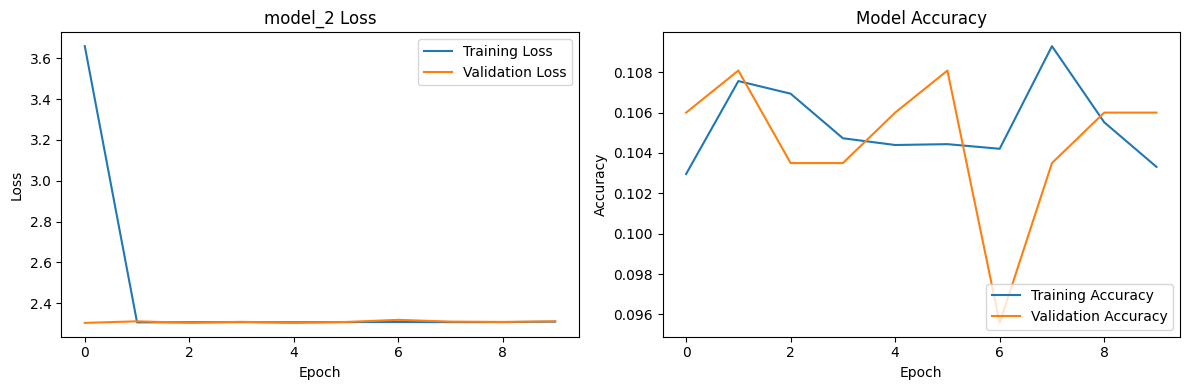

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [17]:
# after my modification: change activation function to 'relu' , w_init mean = 0 , increase epoch to 30
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=0,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()
history2=model_2.fit(X_train,y_train,epochs=30 , batch_size=128,validation_split=0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3844 - loss: 297.3298 - val_accuracy: 0.7774 - val_loss: 41.3539
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7913 - loss: 36.9805 - val_accuracy: 0.8444 - val_loss: 24.8399
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8525 - loss: 22.2245 - val_accuracy: 0.8725 - val_loss: 18.6549
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8802 - loss: 16.2321 - val_accuracy: 0.8898 - val_loss: 15.1928
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8974 - loss: 12.3821 - val_accuracy: 0.8982 - val_loss: 13.0948
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9109 - loss: 9.8367 - val_accuracy: 0.9038 - val_loss: 11.7500
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9215 - loss: 8.0975 - val_accuracy: 0.9073 - val_loss: 10.8941
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9279 - loss: 6.7459 - val

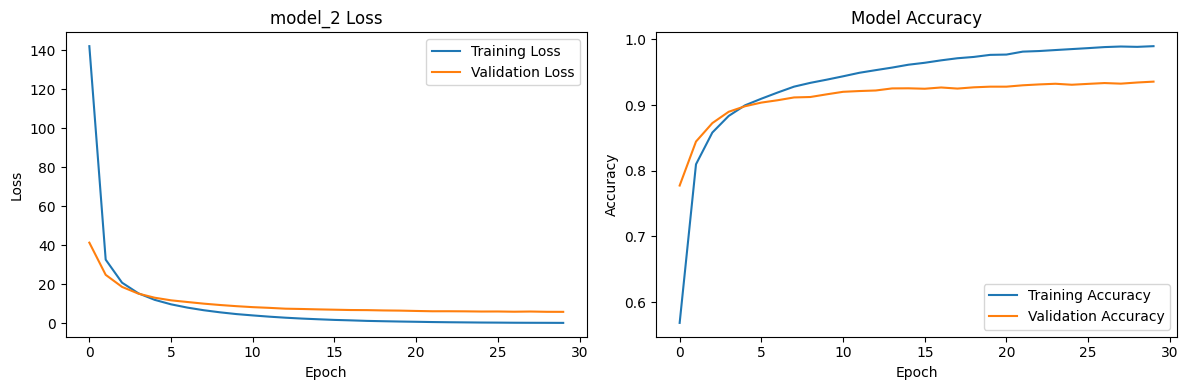

In [18]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

changing the activation function to Relu and take care with the weight initialization .... i make the mean equal to 0 to get better results
*******************************
✅ <font color='green'>Great Answer </font>  Why you used only two hiidden layer without any addition steps like batch norm or dropout or increasing the number of nodes also you can increase the number of epoches...etc ??

# Exploding Gradient

# Q4: What is the main cause of the Exploding gradient problem, and how can we solve it?

The exploding gradient problem mainly arises from the repeated multiplication of large gradients during backpropagation in deep networks, causing weights to grow excessively. To solve it, you can use techniques like gradient clipping, which limits the gradients to a certain threshold.
**************************************
✅ <font color='green'>Great Answer </font> 

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [0.43676588, 0.047036156, 1.1472908, 0.13953106]
Gradient Norms: [0.4259558, 0.044139095, 1.076017, 0.13074371]
Gradient Norms: [0.41634166, 0.0414419, 1.0098573, 0.1225713]
Gradient Norms: [0.40778586, 0.03892521, 0.94832504, 0.114955045]
Gradient Norms: [0.40016863, 0.0365723, 0.8909979, 0.10784294]
Gradient Norms: [0.3933856, 0.03436875, 0.83751065, 0.10119027]
Gradient Norms: [0.3873454, 0.032302115, 0.78754705, 0.09495798]
Gradient Norms: [0.38196802, 0.030361611, 0.7408328, 0.08911255]
Gradient Norms: [0.3771827, 0.02853789, 0.6971297, 0.083624415]
Gradient Norms: [0.37292695, 0.02682278, 0.65622985, 0.07846761]


## "Please provide proof of the effectiveness of your solution. How does it impact the results?" print here all Gradient term before and after add your solution



there wasn't explosion in the first code or the modified one as gradient values were decreasing................................................................................

✅ <font color='green'>Great Answer </font> 

...........................................

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -1.0, 1.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [1.0431554, 0.10323395, 0.504567, 0.08550422]
Gradient Norms: [1.0307736, 0.10108288, 0.49584287, 0.082314074]
Gradient Norms: [1.0191256, 0.09908265, 0.48773602, 0.07930049]
Gradient Norms: [1.0083034, 0.09724888, 0.48019508, 0.076453]
Gradient Norms: [0.99815935, 0.09552491, 0.47317135, 0.07376177]
Gradient Norms: [0.9885975, 0.0939497, 0.46662372, 0.071217895]
Gradient Norms: [0.97933215, 0.09244238, 0.46051693, 0.068813786]
Gradient Norms: [0.9706225, 0.09104659, 0.4548189, 0.066542774]
Gradient Norms: [0.96247095, 0.08975034, 0.44949788, 0.06439857]
Gradient Norms: [0.95450705, 0.08847675, 0.4445244, 0.062373936]


✅ kindly provide your answer for how clip by value effect of decrease the value of weights

# Q5: Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance.

..................................................................

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Create a simple neural network without Dropout
model_without_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model_without_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6393 - loss: 1.3166 - val_accuracy: 0.8986 - val_loss: 0.3606
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9003 - loss: 0.3502 - val_accuracy: 0.9186 - val_loss: 0.2850
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9155 - loss: 0.2911 - val_accuracy: 0.9253 - val_loss: 0.2550
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9252 - loss: 0.2582 - val_accuracy: 0.9346 - val_loss: 0.2306
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9351 - loss: 0.2306 - val_accuracy: 0.9398 - val_loss: 0.2122
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9392 - loss: 0.2147 - val_accuracy: 0.9409 - val_loss: 0.1978
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9438 - loss: 0.1943 - val_accuracy: 0.9452 - val_loss: 0.1843
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9492 - loss: 0.1783 - 

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Create a simple neural network with Dropout
model_with_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),#you can incrase number of nodes here 
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% rate######### why used another dropout here


    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3753 - loss: 1.7769 - val_accuracy: 0.8596 - val_loss: 0.5552
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7422 - loss: 0.8028 - val_accuracy: 0.8932 - val_loss: 0.3877
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8072 - loss: 0.6231 - val_accuracy: 0.9094 - val_loss: 0.3204
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8354 - loss: 0.5532 - val_accuracy: 0.9172 - val_loss: 0.2858
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8546 - loss: 0.4929 - val_accuracy: 0.9263 - val_loss: 0.2599
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8668 - loss: 0.4557 - val_accuracy: 0.9311 - val_loss: 0.2433
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.4182 - val_accuracy: 0.9358 - val_loss: 0.2263
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8833 - loss: 0.4027 - 

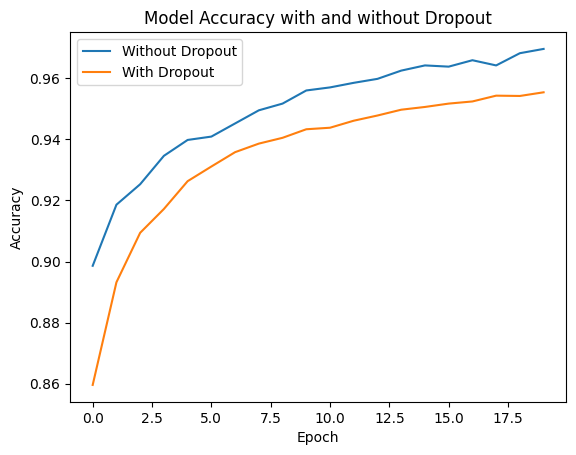

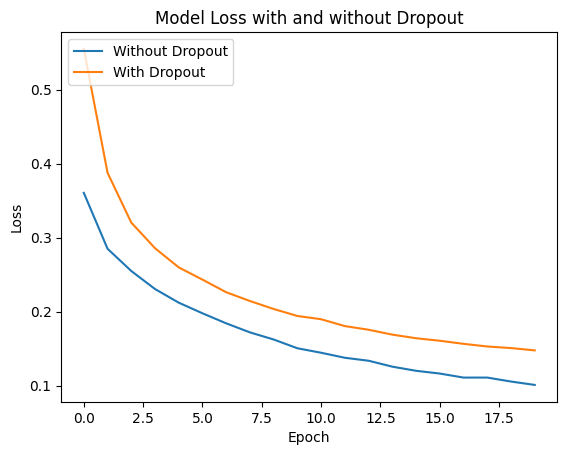

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.title('Model Accuracy with and without Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_without_dropout.history['val_loss'], label='Without Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout')
plt.title('Model Loss with and without Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

| Dropout    | Accuracy       |
|------------|----------------|
| Before     |                |
| After      |                |


❌  <font color='red'>Where is your answer??? </font> 

kindly we always used dropout for the last layer and increase the number of rate till reach to perfect accuracy and if you need to used it every hidden layer kindly increase the number of nodes of each layer

# Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance.

Training with activation: relu
model accuracy with activation: relu is  0.9789999723434448
Training with activation: sigmoid
model accuracy with activation: sigmoid is  0.9772999882698059
Training with activation: tanh
model accuracy with activation: tanh is  0.980400025844574
Training with activation: <LeakyReLU name=leaky_re_lu, built=False>
model accuracy with activation: <LeakyReLU name=leaky_re_lu, built=True> is  0.9754999876022339
Training with activation: elu
model accuracy with activation: elu is  0.9787999987602234


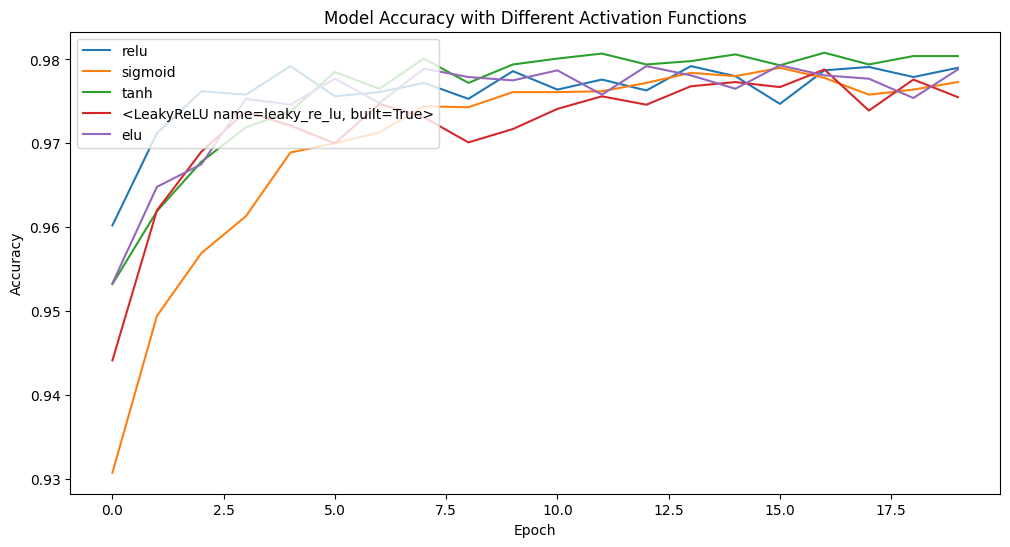

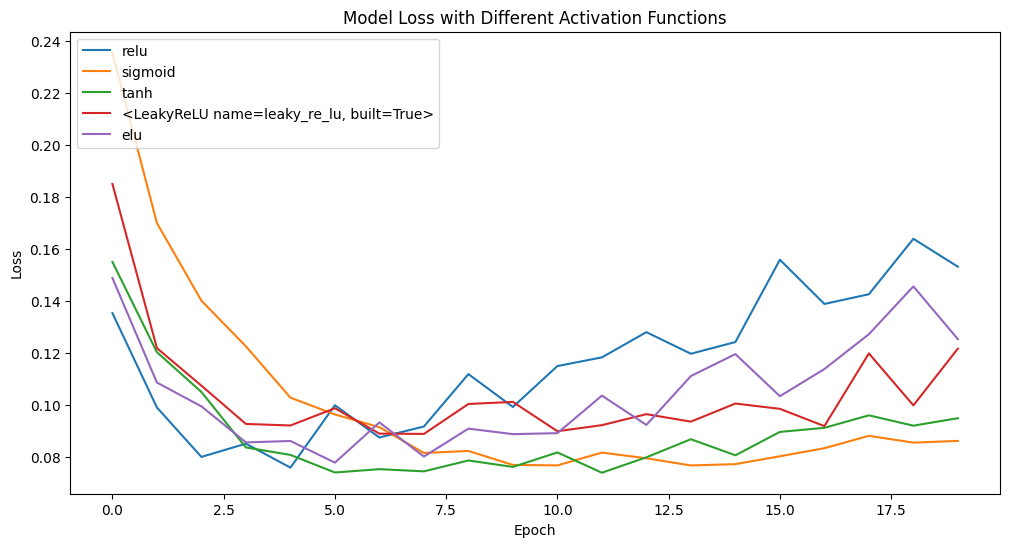

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

def create_model(activation):
    """ Creates a model with the specified activation function """
    model = tf.keras.Sequential([
        Dense(100, input_shape=(784,), activation=activation),
        Dense(100, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models for each activation function
activation_functions = ['relu', 'sigmoid', 'tanh', LeakyReLU(), 'elu']
history_dict = {}

for activation in activation_functions:
    model = create_model(activation)
    print(f"Training with activation: {activation}")
    history = model.fit(X_train, y_train, epochs=20, batch_size=48, validation_data=(X_test, y_test), verbose=0)
    history_dict[activation] = history
    print(f"model accuracy with activation: {activation} is ",history.history['val_accuracy'][-1])
    

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_accuracy'], label=f'{activation}')
plt.title('Model Accuracy with Different Activation Functions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_loss'], label=f'{activation}')
plt.title('Model Loss with Different Activation Functions')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


| Activation Function | Accuracy |
|---------------------|----------|
| ReLU                |   0.97899       |
| Sigmoid             |   0.97729       |
| Tanh                |   0.9804  ✅ |
| Leaky ReLU          |   0.975499       |
| ELU (Exponential Linear Unit) | 0.97 |

✅ <font color='green'>Great job  </font> 

# Q7: What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer? Please provide code examples to support your suggestions.

The best approach for improving model performance—adding more hidden layers or increasing the number of nodes per layer—depends on the specific problem and dataset. Generally:

1. Adding More Hidden Layers: This can capture more complex patterns, especially for tasks like image and speech recognition. However, deeper networks can also lead to issues like vanishing gradients.

2. Increasing Nodes per Layer: This enhances the capacity of each layer to learn, but it can lead to overfitting if the model becomes too complex relative to the amount of training data.

Recommended Approach:
Often, a combination of both techniques yields the best results. It's crucial to experiment with architectures and perform hyperparameter tuning.


as shown in the two following examples codes:
making compination of hidden layers and increase number of node will give more accuracy (in this example ... it reaches 98%) on the other side using one method will give less accuracy ( in this example 90 %)

✅ <font color='green'>Good answer but not common answer ........you mention before very deep arctucture leed to vanishing so good way for increse the number of node more than increase the number of layers .however your answer accpted by some cases</font> 

In [20]:
# without any hidden layers

import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    #x = tf.keras.layers.Dense(50, activation='relu')(inputs)
    # Hidden layer2
    #x2 = tf.keras.layers.Dense(50, activation='relu')(x)
    # Hidden layer2
   # x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    #x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(inputs)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=500, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4876 - loss: 1.7138 - val_accuracy: 0.8500 - val_loss: 0.7036
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8491 - loss: 0.6705 - val_accuracy: 0.8805 - val_loss: 0.4951
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8745 - loss: 0.5076 - val_accuracy: 0.8960 - val_loss: 0.4193
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.4327 - val_accuracy: 0.9020 - val_loss: 0.3794
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8964 - loss: 0.4010 - val_accuracy: 0.9077 - val_loss: 0.3539
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9005 - loss: 0.3727 - val_accuracy: 0.9093 - val_loss: 0.3369
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9055 - loss: 0.3492 - val_accuracy: 0.9122 - val_loss: 0.3250
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9085 - loss: 0.3375 - val_accuracy: 0.9153 - val_loss:

In [22]:
# without 1 hidden layer with 50 node

import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(50, activation='relu')(inputs)
    # Hidden layer2
    #x2 = tf.keras.layers.Dense(50, activation='relu')(x)
    # Hidden layer2
   # x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    #x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
       
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=500, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")
    

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5916 - loss: 1.3645 - val_accuracy: 0.8980 - val_loss: 0.3877
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8987 - loss: 0.3748 - val_accuracy: 0.9193 - val_loss: 0.2918
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9219 - loss: 0.2850 - val_accuracy: 0.9325 - val_loss: 0.2484
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9317 - loss: 0.2472 - val_accuracy: 0.9393 - val_loss: 0.2223
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9395 - loss: 0.2197 - val_accuracy: 0.9448 - val_loss: 0.2036
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9442 - loss: 0.1973 - val_accuracy: 0.9489 - val_loss: 0.1876
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9487 - loss: 0.1811 - val_accuracy: 0.9504 - val_loss: 0.1772
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9525 - loss: 0.1681 - val_accuracy: 0.9517 - val_loss

# Q8: Why is it important to normalize data before training a neural network? Explain the reasons and benefits of data normalization in the context of neural network training.

Normalizing data before training a neural network is crucial for several reasons:

1. Improved Convergence Speed: Normalization helps gradients propagate more effectively. When features are on different scales, it can lead to slow convergence, as the optimizer might take very small or very large steps, making it harder to find the optimal solution.

2. Preventing Exploding/Vanishing Gradients: Normalized inputs reduce the risk of extreme values, which can contribute to the exploding and vanishing gradient problems. Keeping data in a consistent range helps stabilize training.

3. Balanced Feature Importance: Without normalization, features with larger scales can dominate the learning process. Normalizing ensures that all features contribute equally to the model's performance, leading to more balanced learning.



✅ <font color='green'>Good answer  </font> 

# Q9 What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks




Batch normalization is a technique used to stabilize and accelerate the training of deep neural networks by normalizing the input of each layer for each mini-batch. This involves adjusting the mean and variance of the layer's inputs, ensuring they maintain a consistent distribution during training.

 Benefits:
1. Faster Convergence: By normalizing inputs, batch normalization allows for higher learning rates, leading to quicker convergence during training.

2. Reduced Internal Covariate Shift: It mitigates the problem of internal covariate shift, where the distribution of layer inputs changes during training, which can slow down learning.

3. Improved Gradient Flow: By maintaining more stable activations, it helps gradients flow better through the network, reducing issues like vanishing or exploding gradients.





✅ <font color='green'>Good answer </font> 

# How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."

.........................................

| batch normalization | Accuracy |
|---------------------|----------|
| Before              |          |
| After               |          |

❌  <font color='red'>Where is your answer??? </font> 

# Advanced Part (optional)

# Convert your TensorFlow model to PyTorch. Provide the PyTorch code equivalent of your TensorFlow model, ensuring that the architecture, hyperparameters, and any custom layers or functionalities are correctly translated."

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(784, 50)  # one Hidden layer with 50 node
        self.fc2 = nn.Linear(50, 10)   # Output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Hidden layer with ReLU activation
        x = F.softmax(self.fc2(x), dim=1)  # Output layer with softmax
        return x


# Initialize the model
model = SimpleNN()

# Set optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Prepare your dataset (Assuming X_train and y_train are in numpy arrays)
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.long)  # PyTorch expects labels as longs
train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)



# Train the model
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# Evaluate the model on the test set
model.eval()
test_data = torch.tensor(X_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.long)
test_outputs = model(test_data)
_, test_predicted = torch.max(test_outputs, 1)
test_acc = (test_predicted == test_labels).sum().item() / len(test_labels)
print(f"Test accuracy: {test_acc:.2f}")



Epoch [1/30], Loss: 1.6180, Accuracy: 87.91%
Epoch [2/30], Loss: 1.5404, Accuracy: 92.92%
Epoch [3/30], Loss: 1.5260, Accuracy: 94.12%
Epoch [4/30], Loss: 1.5161, Accuracy: 95.01%
Epoch [5/30], Loss: 1.5096, Accuracy: 95.60%
Epoch [6/30], Loss: 1.5044, Accuracy: 96.10%
Epoch [7/30], Loss: 1.5000, Accuracy: 96.49%
Epoch [8/30], Loss: 1.4966, Accuracy: 96.78%
Epoch [9/30], Loss: 1.4939, Accuracy: 97.05%
Epoch [10/30], Loss: 1.4914, Accuracy: 97.30%
Epoch [11/30], Loss: 1.4894, Accuracy: 97.45%
Epoch [12/30], Loss: 1.4874, Accuracy: 97.67%
Epoch [13/30], Loss: 1.4863, Accuracy: 97.72%
Epoch [14/30], Loss: 1.4847, Accuracy: 97.88%
Epoch [15/30], Loss: 1.4836, Accuracy: 97.97%
Epoch [16/30], Loss: 1.4823, Accuracy: 98.12%
Epoch [17/30], Loss: 1.4814, Accuracy: 98.17%
Epoch [18/30], Loss: 1.4808, Accuracy: 98.22%
Epoch [19/30], Loss: 1.4799, Accuracy: 98.30%
Epoch [20/30], Loss: 1.4790, Accuracy: 98.36%
Epoch [21/30], Loss: 1.4785, Accuracy: 98.44%
Epoch [22/30], Loss: 1.4777, Accuracy: 98.5

In [37]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(50, activation='relu')(inputs)
    # Hidden layer2
    #x2 = tf.keras.layers.Dense(50, activation='relu')(x)
    # Hidden layer2
   # x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    #x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
       
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=30, batch_size=50, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8308 - loss: 0.6352 - val_accuracy: 0.9403 - val_loss: 0.2165
Epoch 2/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9415 - loss: 0.2003 - val_accuracy: 0.9521 - val_loss: 0.1676
Epoch 3/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9548 - loss: 0.1557 - val_accuracy: 0.9572 - val_loss: 0.1494
Epoch 4/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9637 - loss: 0.1244 - val_accuracy: 0.9628 - val_loss: 0.1303
Epoch 5/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9679 - loss: 0.1067 - val_accuracy: 0.9643 - val_loss: 0.1267
Epoch 6/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9738 - loss: 0.0913 - val_accuracy: 0.9654 - val_loss: 0.1270
Epoch 7/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9784 - loss: 0.0765 - val_accuracy: 0.9685 - val_loss: 0.1127
Epoch 8/30
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0660 - val_accuracy: 0.

# Finally, print the accuracy for each model architecture. Discuss with your team the differences observed in accuracy across various architectures, and analyze the potential reasons behind these variations."

the accuracy with pytorch equal 97 % and with tensor flow equal 96.9%
In terms of accuracy alone, neither TensorFlow nor PyTorch has a significant edge over the other. The choice should be based more on usability, flexibility, and deployment needs. If the model is implemented well in either framework, the resulting performance and accuracy will be similar.

# Callback

### search for Callback method In TensorFlow and Keras, a callback is a set of functions that can be applied at various stages of the training process, allowing you to customize the behavior of the training loop. Callbacks provide a way to monitor and intervene during training, enabling features 

# Tensorboard!!!!!!

## Review the following code and provide a detailed explanation of how it works. Describe each section and its purpose, and explain how the code achieves its intended functionality.

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Split data into training and validation sets
X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer, X_train, y_train, X_val, y_val):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=10, 
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'AdaDelta': tf.keras.optimizers.Adadelta(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

# Train and evaluate models with different optimizers
results = {}
for name, optimizer in optimizers.items():
    accuracy = train_and_evaluate(optimizer, X_train, y_train, X_val, y_val)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"Optimizer: {name}, Validation Accuracy: {accuracy:.4f}")


Optimizer: SGD, Validation Accuracy: 0.9477
Optimizer: Momentum, Validation Accuracy: 0.9759
Optimizer: RMSprop, Validation Accuracy: 0.9767
Optimizer: AdaDelta, Validation Accuracy: 0.7709
Optimizer: Adagrad, Validation Accuracy: 0.9058
Optimizer: Adam, Validation Accuracy: 0.9774


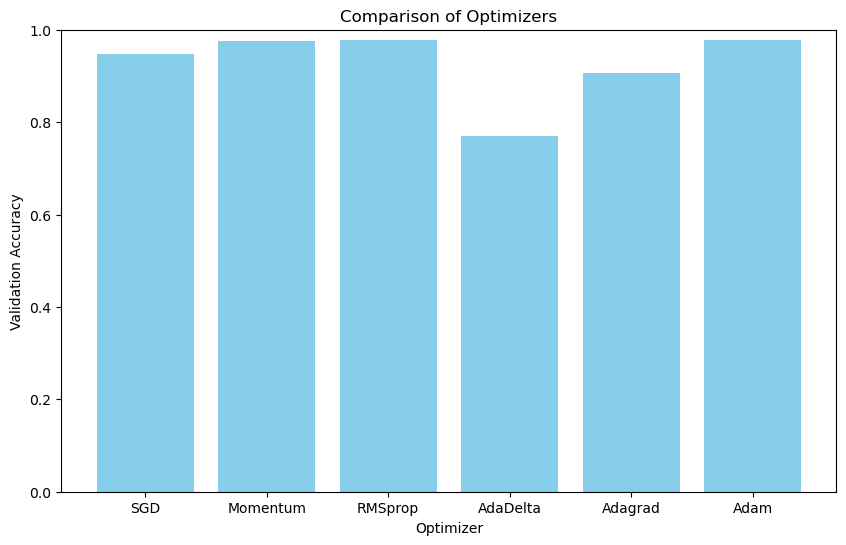

In [39]:
# Plotting the results
names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Optimizers')
plt.ylim([0, 1])
plt.show()

# Anothe challenge

# In this dataset, all deep learning architectures attempted so far have resulted in overfitting. Explore and apply various techniques to mitigate overfitting, such as regularization, dropout, data augmentation, and early stopping. Please provide feedback on the effectiveness of each method and summarize your results.

# Dataset Description

This dataset contains information related to students in an educational context. It includes various demographic, behavioral, and academic features, which can be used to analyze student performance and engagement. The dataset consists of the following attributes:

- **gender:** The gender of the student (e.g., male, female).
- **NationalITy:** The nationality of the student, which may influence educational outcomes.
- **PlaceofBirth:** The geographic location where the student was born, providing insights into potential cultural and socio-economic factors.
- **StageID:** The educational stage or level the student is currently in (e.g., primary, secondary).
- **GradeID:** The grade or year the student is enrolled in, indicating their progress in the education system.
- **SectionID:** The specific section or class within a grade that the student belongs to.
- **Topic:** The subject or topic of study, relevant for performance analysis in specific areas.
- **Semester:** The semester in which the data was collected, which may affect academic performance and engagement.
- **Relation:** The relationship of the student with their parents (e.g., mother, father), potentially influencing support and academic outcomes.
- **raisedhands:** The number of times the student raised their hands in class, indicating participation and engagement.
- **VisITedResources:** The number of educational resources the student has accessed, which reflects their engagement with the material.
- **AnnouncementsView:** The number of times the student viewed announcements from the school, suggesting their awareness of important updates.
- **Discussion:** The level of participation in discussions, indicating engagement in collaborative learning.
- **ParentAnsweringSurvey:** Responses from parents in a survey, which may provide insights into parental involvement.
- **ParentschoolSatisfaction:** The satisfaction level of parents with the school, which could correlate with student performance.
- **StudentAbsenceDays:** The number of days the student was absent, which can impact learning outcomes.
- **Class:** The target variable indicating the student's performance category or final grade, often used for classification tasks.

**Challenges:** The dataset may exhibit challenges such as class imbalance, varying levels of engagement among students, and the influence of external factors on academic performance.

This dataset is suitable for analysis aimed at understanding student behavior, predicting academic outcomes, and identifying factors contributing to student success or challenges.


Epoch 1/30


C:\Users\ELZAHBIA\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\ELZAHBIA\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4328 - loss: 19.9104 - val_accuracy: 0.4598 - val_loss: 19.5356
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4368 - loss: 19.4162 - val_accuracy: 0.4598 - val_loss: 19.0535
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4254 - loss: 18.9363 - val_accuracy: 0.4598 - val_loss: 18.5789
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4056 - loss: 18.4648 - val_accuracy: 0.4598 - val_loss: 18.1176
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4305 - loss: 18.0059 - val_accuracy: 0.4598 - val_loss: 17.6684
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4438 - loss: 17.5593 - val_accuracy: 0.4598 - val_loss: 17.2287
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4099 - loss: 17.1236 - val_accuracy: 0.4598 - val_loss: 16.8067
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4013 - loss: 16.7048 - val_accuracy: 0.4598 

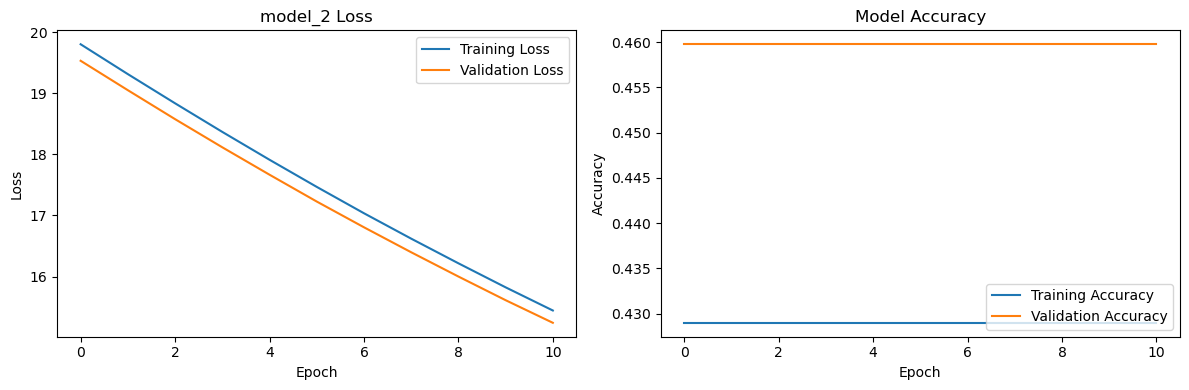

In [71]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from keras.activations import relu, elu, linear, sigmoid
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv(r'E:\machine learning course\final deeplearning project\Dataset.csv')


data.loc[data["Class"] == "L", "Class"] = 0
data.loc[data["Class"] == "M", "Class"] = 1
data.loc[data["Class"] == "H", "Class"] = 2
##display(data)

data['Class'].value_counts()


##print(data.columns)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply OneHotEncoder to categorical features
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 
                       'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']


encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])


# Combine scaled numerical and encoded categorical features
X_preprocessed = np.hstack((X_scaled, X_encoded))




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, random_state=42)
# Convert the labels into float32 (binary classification scenario)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


def create_model(optimizer='adam', learning_rate=0.0001):
    # Input layer
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    
    # Hidden layer
    x = tf.keras.layers.Dense(500, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer='he_normal')(inputs)
    tf.keras.layers.Dropout(0.9),  # Dropout layer with 50% rate
    tf.keras.layers.BatchNormalization(),  # Batch Normalization\

    # Hidden layer2
    x2 = tf.keras.layers.Dense(500, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer='he_normal')(x)
    tf.keras.layers.Dropout(0.9),  # Dropout layer with 50% rate
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    
    # Hidden layer2
   # x3 = tf.keras.layers.Dense(50, activation='relu')(x2)
    # Hidden layer2
    #x4 = tf.keras.layers.Dense(50, activation='relu')(x3)
    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='softmax')(x2)
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
       
    return model



# Define the model
model =create_model() 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True
)
#model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=20, callbacks=[early_stopping])
#history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=100)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test ,batch_size=2)
print(f"Test Accuracy: {test_acc:.4f}")


# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [72]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from keras.activations import relu, elu, linear, sigmoid
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv(r'E:\machine learning course\final deeplearning project\Dataset.csv')


data.loc[data["Class"] == "L", "Class"] = 0
data.loc[data["Class"] == "M", "Class"] = 1
data.loc[data["Class"] == "H", "Class"] = 2
##display(data)

data['Class'].value_counts()


Class
1    211
2    142
0    127
Name: count, dtype: int64

✅ <font color='green'>Good trying </font> 

✅ 
- <font color='green'>I would like to thank you for your great effort, outstanding responses, and diligent solutions. I truly understand that this is a major and challenging project, and you have proven to me your mastery of this module. Therefore, I wish you continued excellence in the rest of the diploma and even in your practical projects. Thank you very much!
{George Samuel}
 </font> 